In [11]:
from sklearn import tree
import pandas as pd
import numpy as np
import imblearn
import seaborn as sns

In [12]:
df = pd.read_csv("../Resources/cleaned_data.csv")
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [13]:
from imblearn.over_sampling import SMOTE
#Oversampling the data

y_raw = df['koi_disposition']
X_raw = df.drop(columns='koi_disposition')
feature_names = X_raw.columns
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(X_raw, y_raw)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
df_oversampler

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467000,0.064000,-0.096000,0.927000,0.105000,-0.061000,291.934230,48.141651,15.347000
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544000,0.044000,-0.176000,0.868000,0.233000,-0.078000,297.004820,48.134129,15.436000
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564000,0.053000,-0.168000,0.791000,0.201000,-0.067000,285.534610,48.285210,15.597000
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438000,0.070000,-0.210000,1.046000,0.334000,-0.133000,288.754880,48.226200,15.509000
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486000,0.054000,-0.229000,0.972000,0.315000,-0.105000,296.286130,48.224670,15.714000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,0,0,0,0,1.151147,2.595649e-06,-2.595649e-06,132.452947,0.001855,-0.001855,...,-180,4.533722,0.038109,-0.195375,0.885286,0.258856,-0.086320,296.524037,41.709046,14.886194
10508,0,0,0,0,11.846732,1.872415e-05,-1.872415e-05,162.838820,0.001274,-0.001274,...,-117,4.363966,0.106420,-0.113284,1.067826,0.170420,-0.131242,292.271241,46.499907,13.801492
10509,0,0,0,0,3.981437,2.993654e-05,-2.993654e-05,131.891153,0.006376,-0.006376,...,-184,4.502038,0.049254,-0.207313,0.948925,0.300589,-0.093425,293.592536,45.123393,15.190825
10510,0,0,0,0,13.329602,3.308297e-05,-3.308297e-05,179.421821,0.001908,-0.001908,...,-138,4.508538,0.055290,-0.129625,0.887988,0.154455,-0.071577,291.234584,44.417917,14.403226


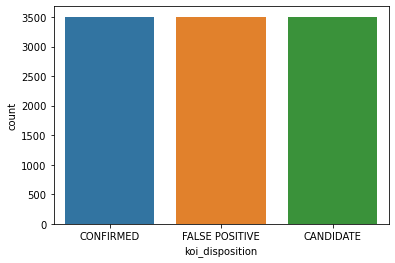

In [14]:
y
sns.countplot(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8755707762557078

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test) 

0.9189497716894978

In [18]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10002567864886965, 'koi_fpflag_co'),
 (0.08658102410605885, 'koi_fpflag_nt'),
 (0.07570509814756421, 'koi_model_snr'),
 (0.07284677058403857, 'koi_fpflag_ss'),
 (0.05002825362622867, 'koi_prad'),
 (0.037588715912339164, 'koi_duration_err2'),
 (0.037094144729039207, 'koi_duration_err1'),
 (0.03688600117850304, 'koi_prad_err1'),
 (0.03578190413884508, 'koi_prad_err2'),
 (0.029155436104836757, 'koi_fpflag_ec'),
 (0.028385307848870917, 'koi_time0bk_err2'),
 (0.027512534931276297, 'koi_duration'),
 (0.02362698874412466, 'koi_time0bk_err1'),
 (0.02116094379746731, 'koi_period'),
 (0.019902495288639296, 'koi_steff_err1'),
 (0.019034268999321872, 'koi_depth'),
 (0.018266934488821364, 'koi_steff_err2'),
 (0.017618030248026835, 'koi_impact'),
 (0.016496960908602226, 'koi_period_err2'),
 (0.016120956768764478, 'koi_insol_err1'),
 (0.01545016103354091, 'koi_period_err1'),
 (0.015355321487904632, 'koi_depth_err1'),
 (0.014891336379313442, 'koi_depth_err2'),
 (0.01465073835153049, 'koi_insol'),


In [19]:
# import joblib
# filename = "random_forest.sav"
# joblib.dump(rf, filename)

In [20]:
predictions = rf.predict(X_test)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted":predictions})
predictions_df.head(20)

,Actual,Predicted
171,CONFIRMED,CONFIRMED
4595,FALSE POSITIVE,FALSE POSITIVE
1027,CANDIDATE,CONFIRMED
3087,CANDIDATE,CANDIDATE
3534,FALSE POSITIVE,FALSE POSITIVE
528,CONFIRMED,CONFIRMED
8314,CANDIDATE,CANDIDATE
8512,CANDIDATE,CANDIDATE
2744,CANDIDATE,CANDIDATE
8236,CANDIDATE,CANDIDATE


In [21]:
predictions_df['match'] = np.where(predictions_df['Predicted'] == predictions_df['Actual'], 1, 0)
print(f"The number of total predictions: {len(predictions_df)}")
print(f"The number of correct predictions: {sum(predictions_df['match'])}")
print(f"The test test accuracy: {round(sum(predictions_df['match'])/len(predictions_df)*100,2)}%")
predictions_df[predictions_df['match']==0].index

The number of total predictions: 2628
The number of correct predictions: 2415
The test test accuracy: 91.89%


Int64Index([ 1027,  8041,  3327,  2055,  1071,   342,  1997,  2210,  1769,
             8544,
            ...
              639,  1644,  2771,   174, 10269,  2539,  4962,  8074,  2074,
             8136],
           dtype='int64', length=213)